In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 200
sns.set_theme(style = 'darkgrid')
sns.color_palette("rocket")
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

In [2]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data',index_col=0)

In [3]:
df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                      
1      28143           0          1          1          1          174   
2      19244           0          1          1          1          215   
3      41354           0          1          1          1         4123   
4      14776           0          1          1          1          500   
5      97752           0          4          1          1        43300   

     Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                       
1              1                  0                0               7000   
2              2                  0                0               6968   
3              4                  0                0               7034   
4              1                  0                0               6952   
5             26               2077                4               6935   

     Award?  
ID#          
1         0  
2         0  
3         0  
4         0  
5         1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [5]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(keep='first', inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

Balance    Qual_miles   cc1_miles    cc2_miles    cc3_miles  \
count  3.998000e+03   3998.000000  3998.00000  3998.000000  3998.000000   
mean   7.361949e+04    144.150575     2.05978     1.014507     1.012256   
std    1.007817e+05    773.757220     1.37699     0.147669     0.195265   
min    0.000000e+00      0.000000     1.00000     1.000000     1.000000   
25%    1.853425e+04      0.000000     1.00000     1.000000     1.000000   
50%    4.313800e+04      0.000000     1.00000     1.000000     1.000000   
75%    9.240500e+04      0.000000     3.00000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.00000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3998.000000  3998.000000        3998.000000      3998.000000   
mean    17149.134567    11.604802         460.170835         1.373937   
std     24152.465996     9.603258        1400.365407         3.793585   
min         0.000000     0.000000           0.000000         0.000000   
25%      1250.000000     3.000000           0.000000         0.000000   
50%      7183.000000    12.000000           0.000000         0.000000   
75%     23810.750000    17.000000         313.500000         1.000000   
max    263685.000000    86.000000       30817.000000        53.000000   

       Days_since_enroll       Award?  
count        3998.000000  3998.000000  
mean         4119.190095     0.370435  
std          2065.007629     0.482982  
min             2.000000     0.000000  
25%          2331.250000     0.000000  
50%          4097.500000     0.000000  
75%          5790.750000     1.000000  
max          8296.000000     1.000000

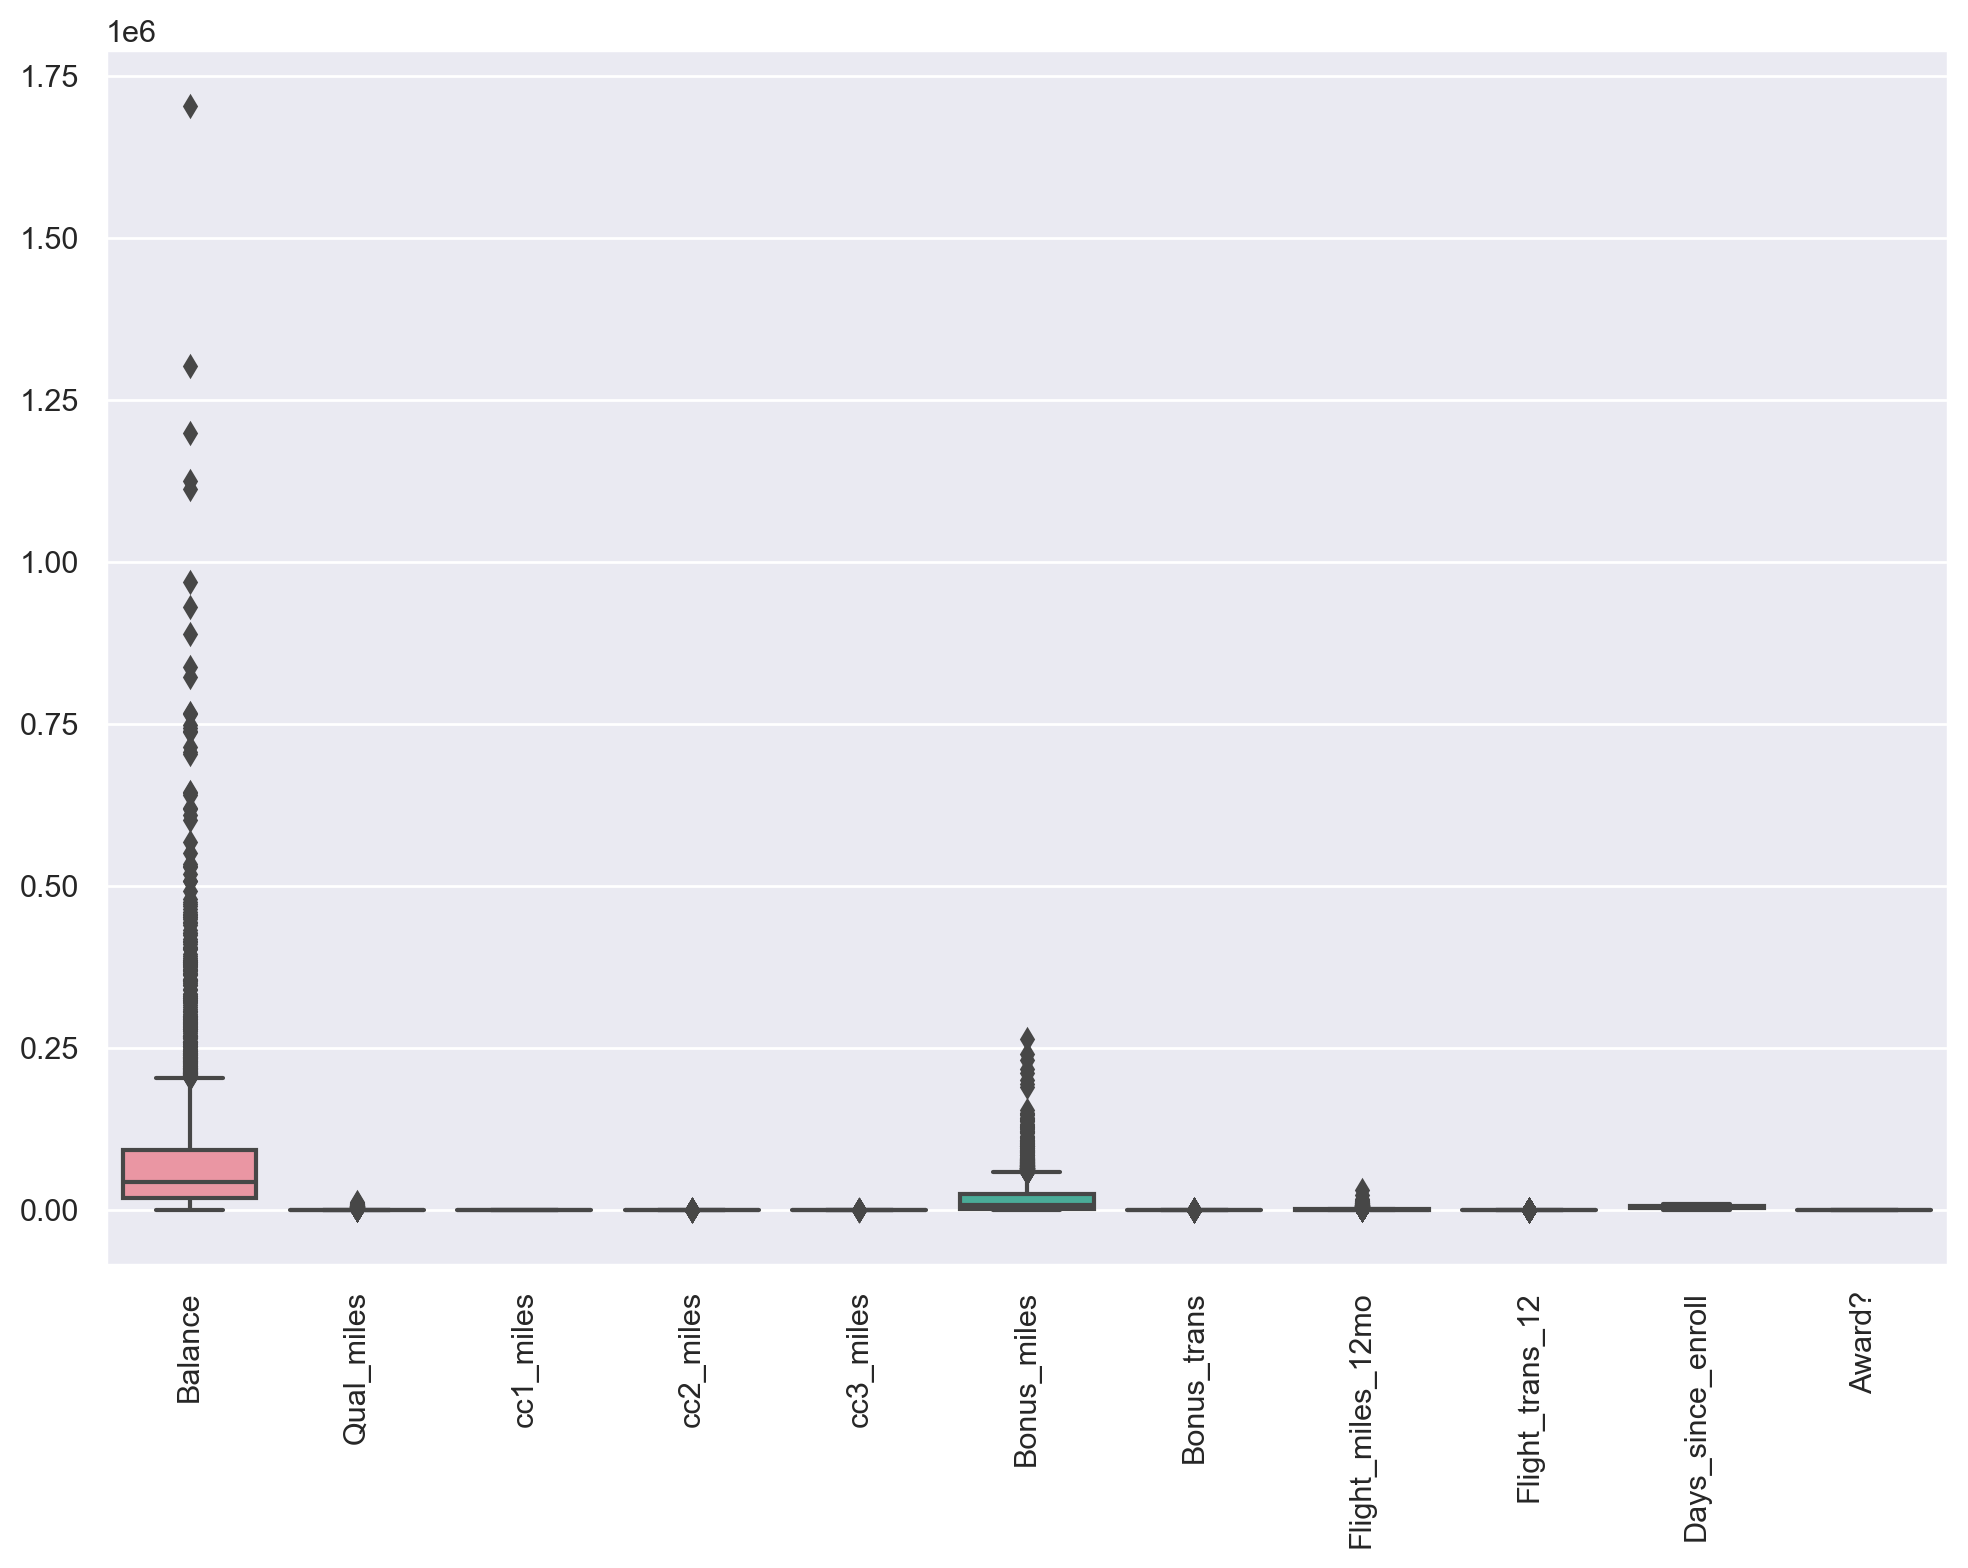

In [10]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.tight_layout()

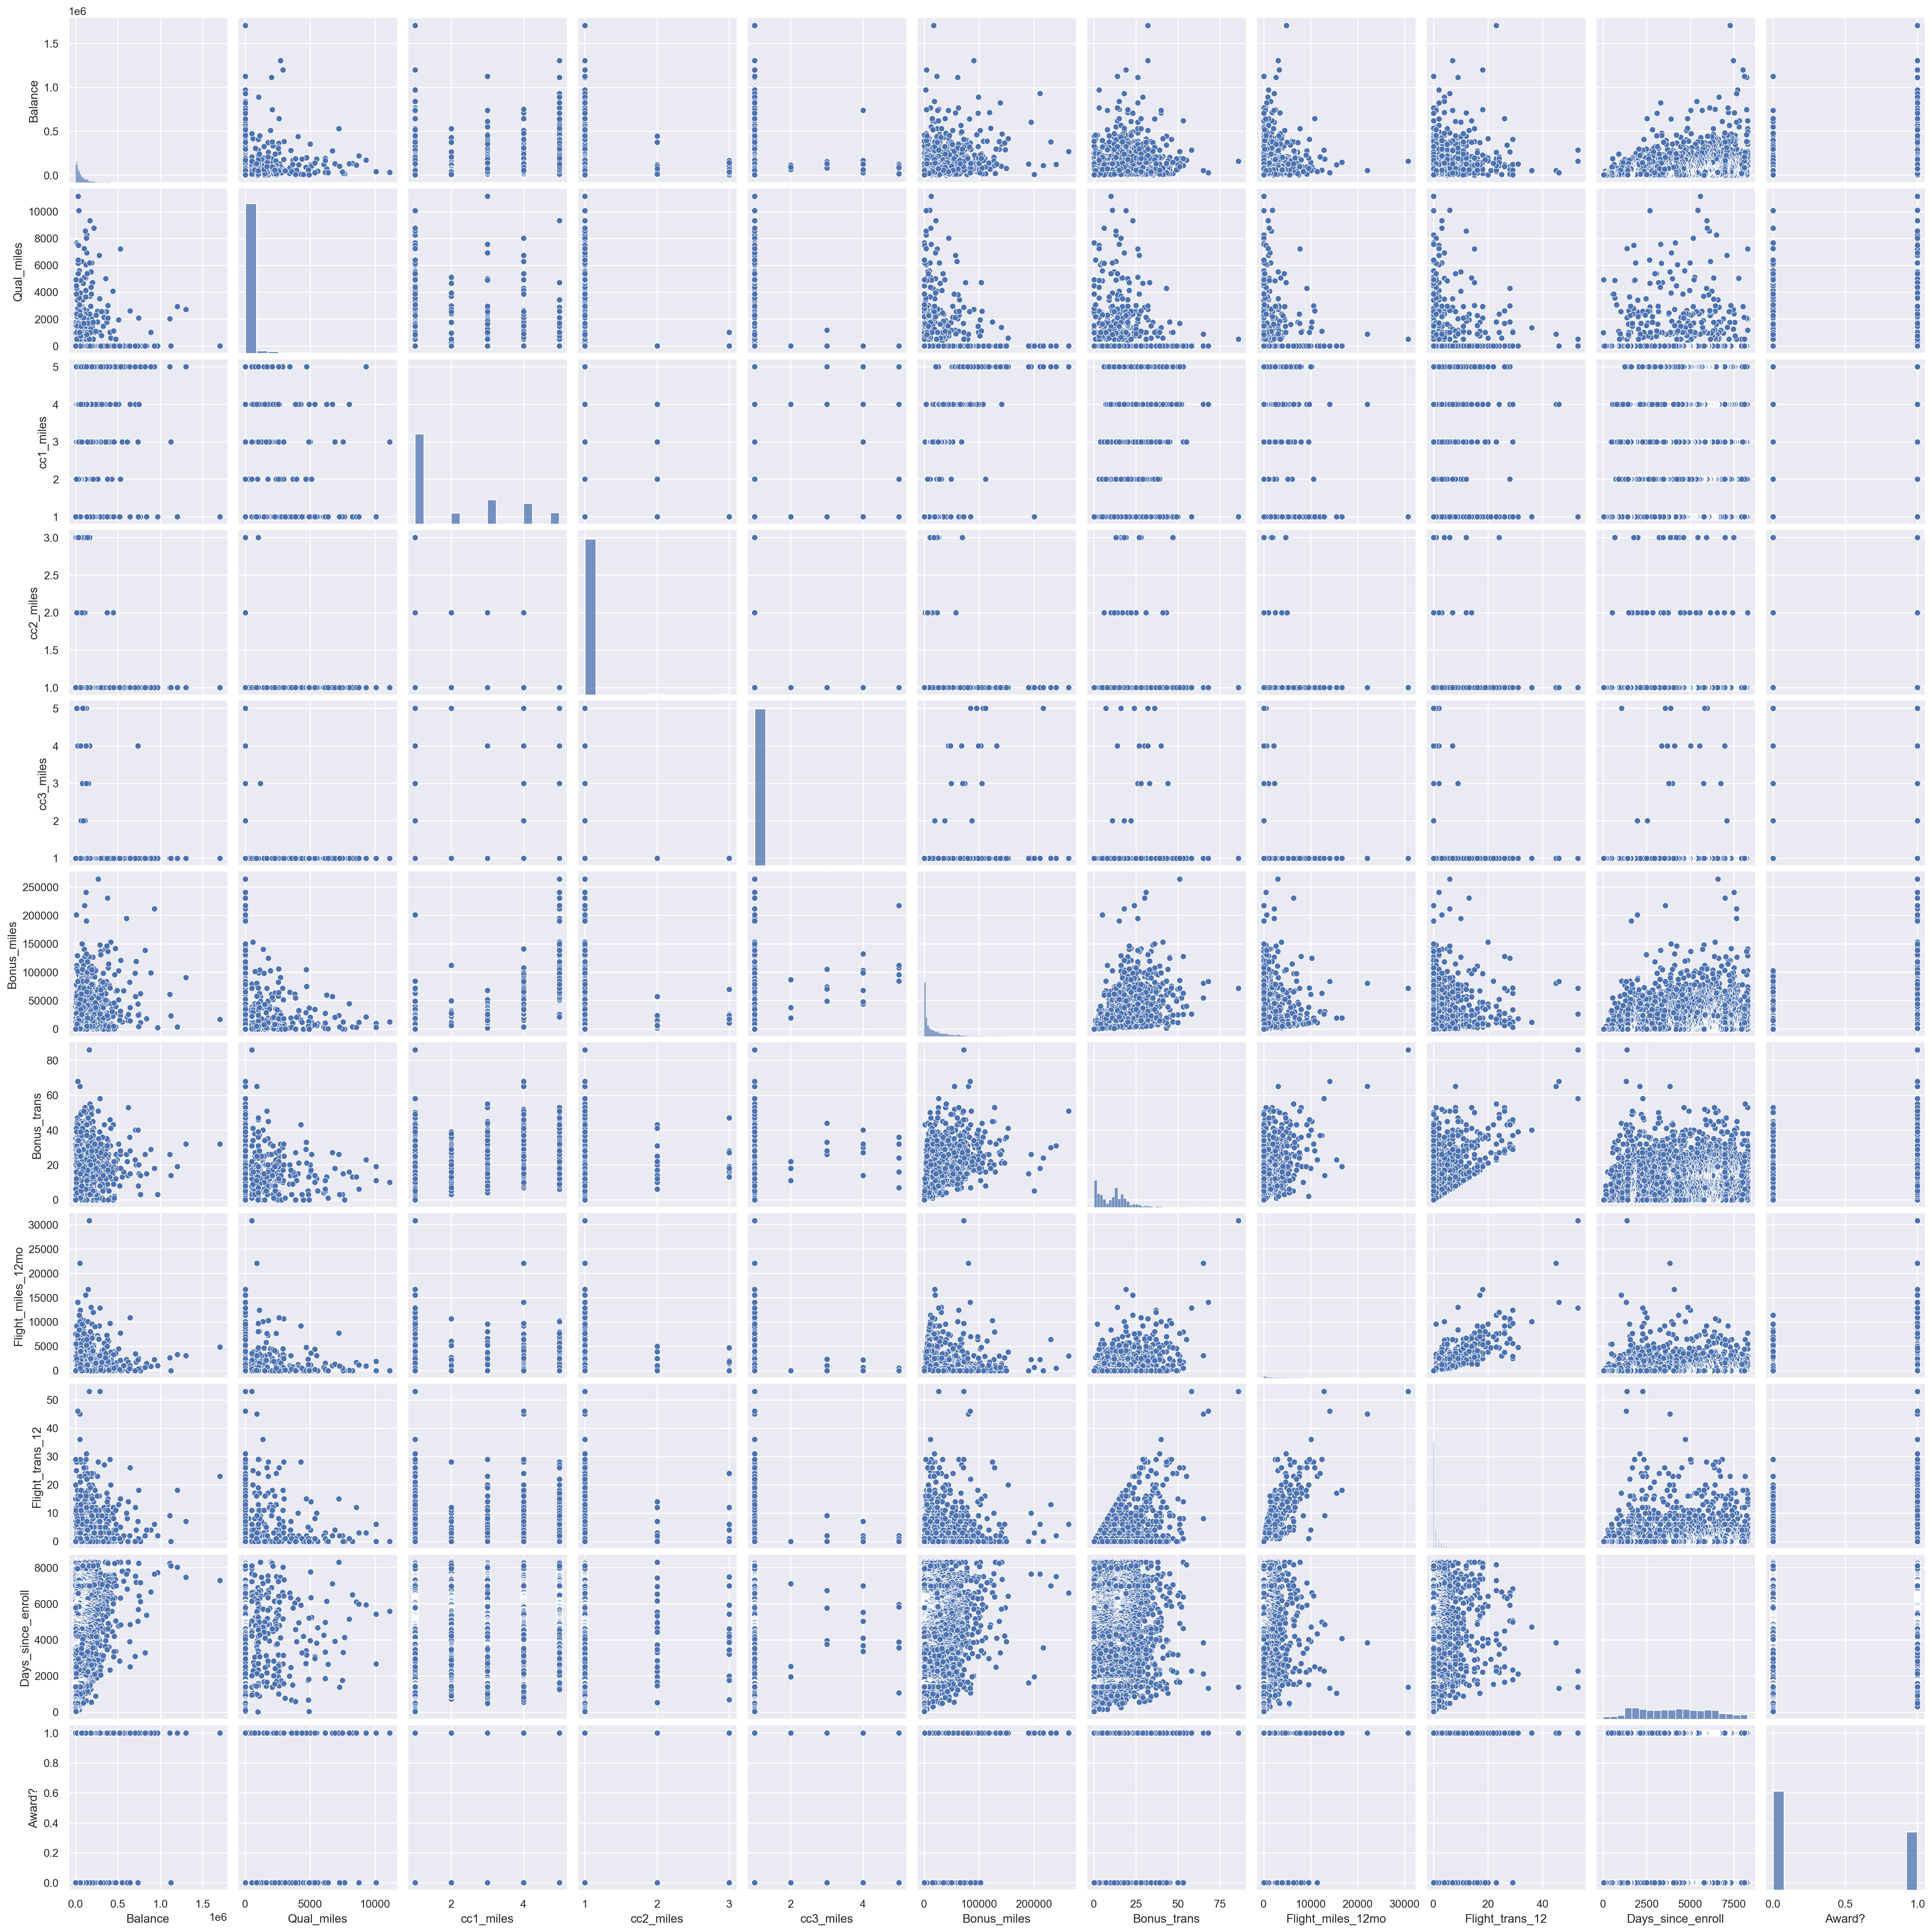

In [11]:
sns.pairplot(df)

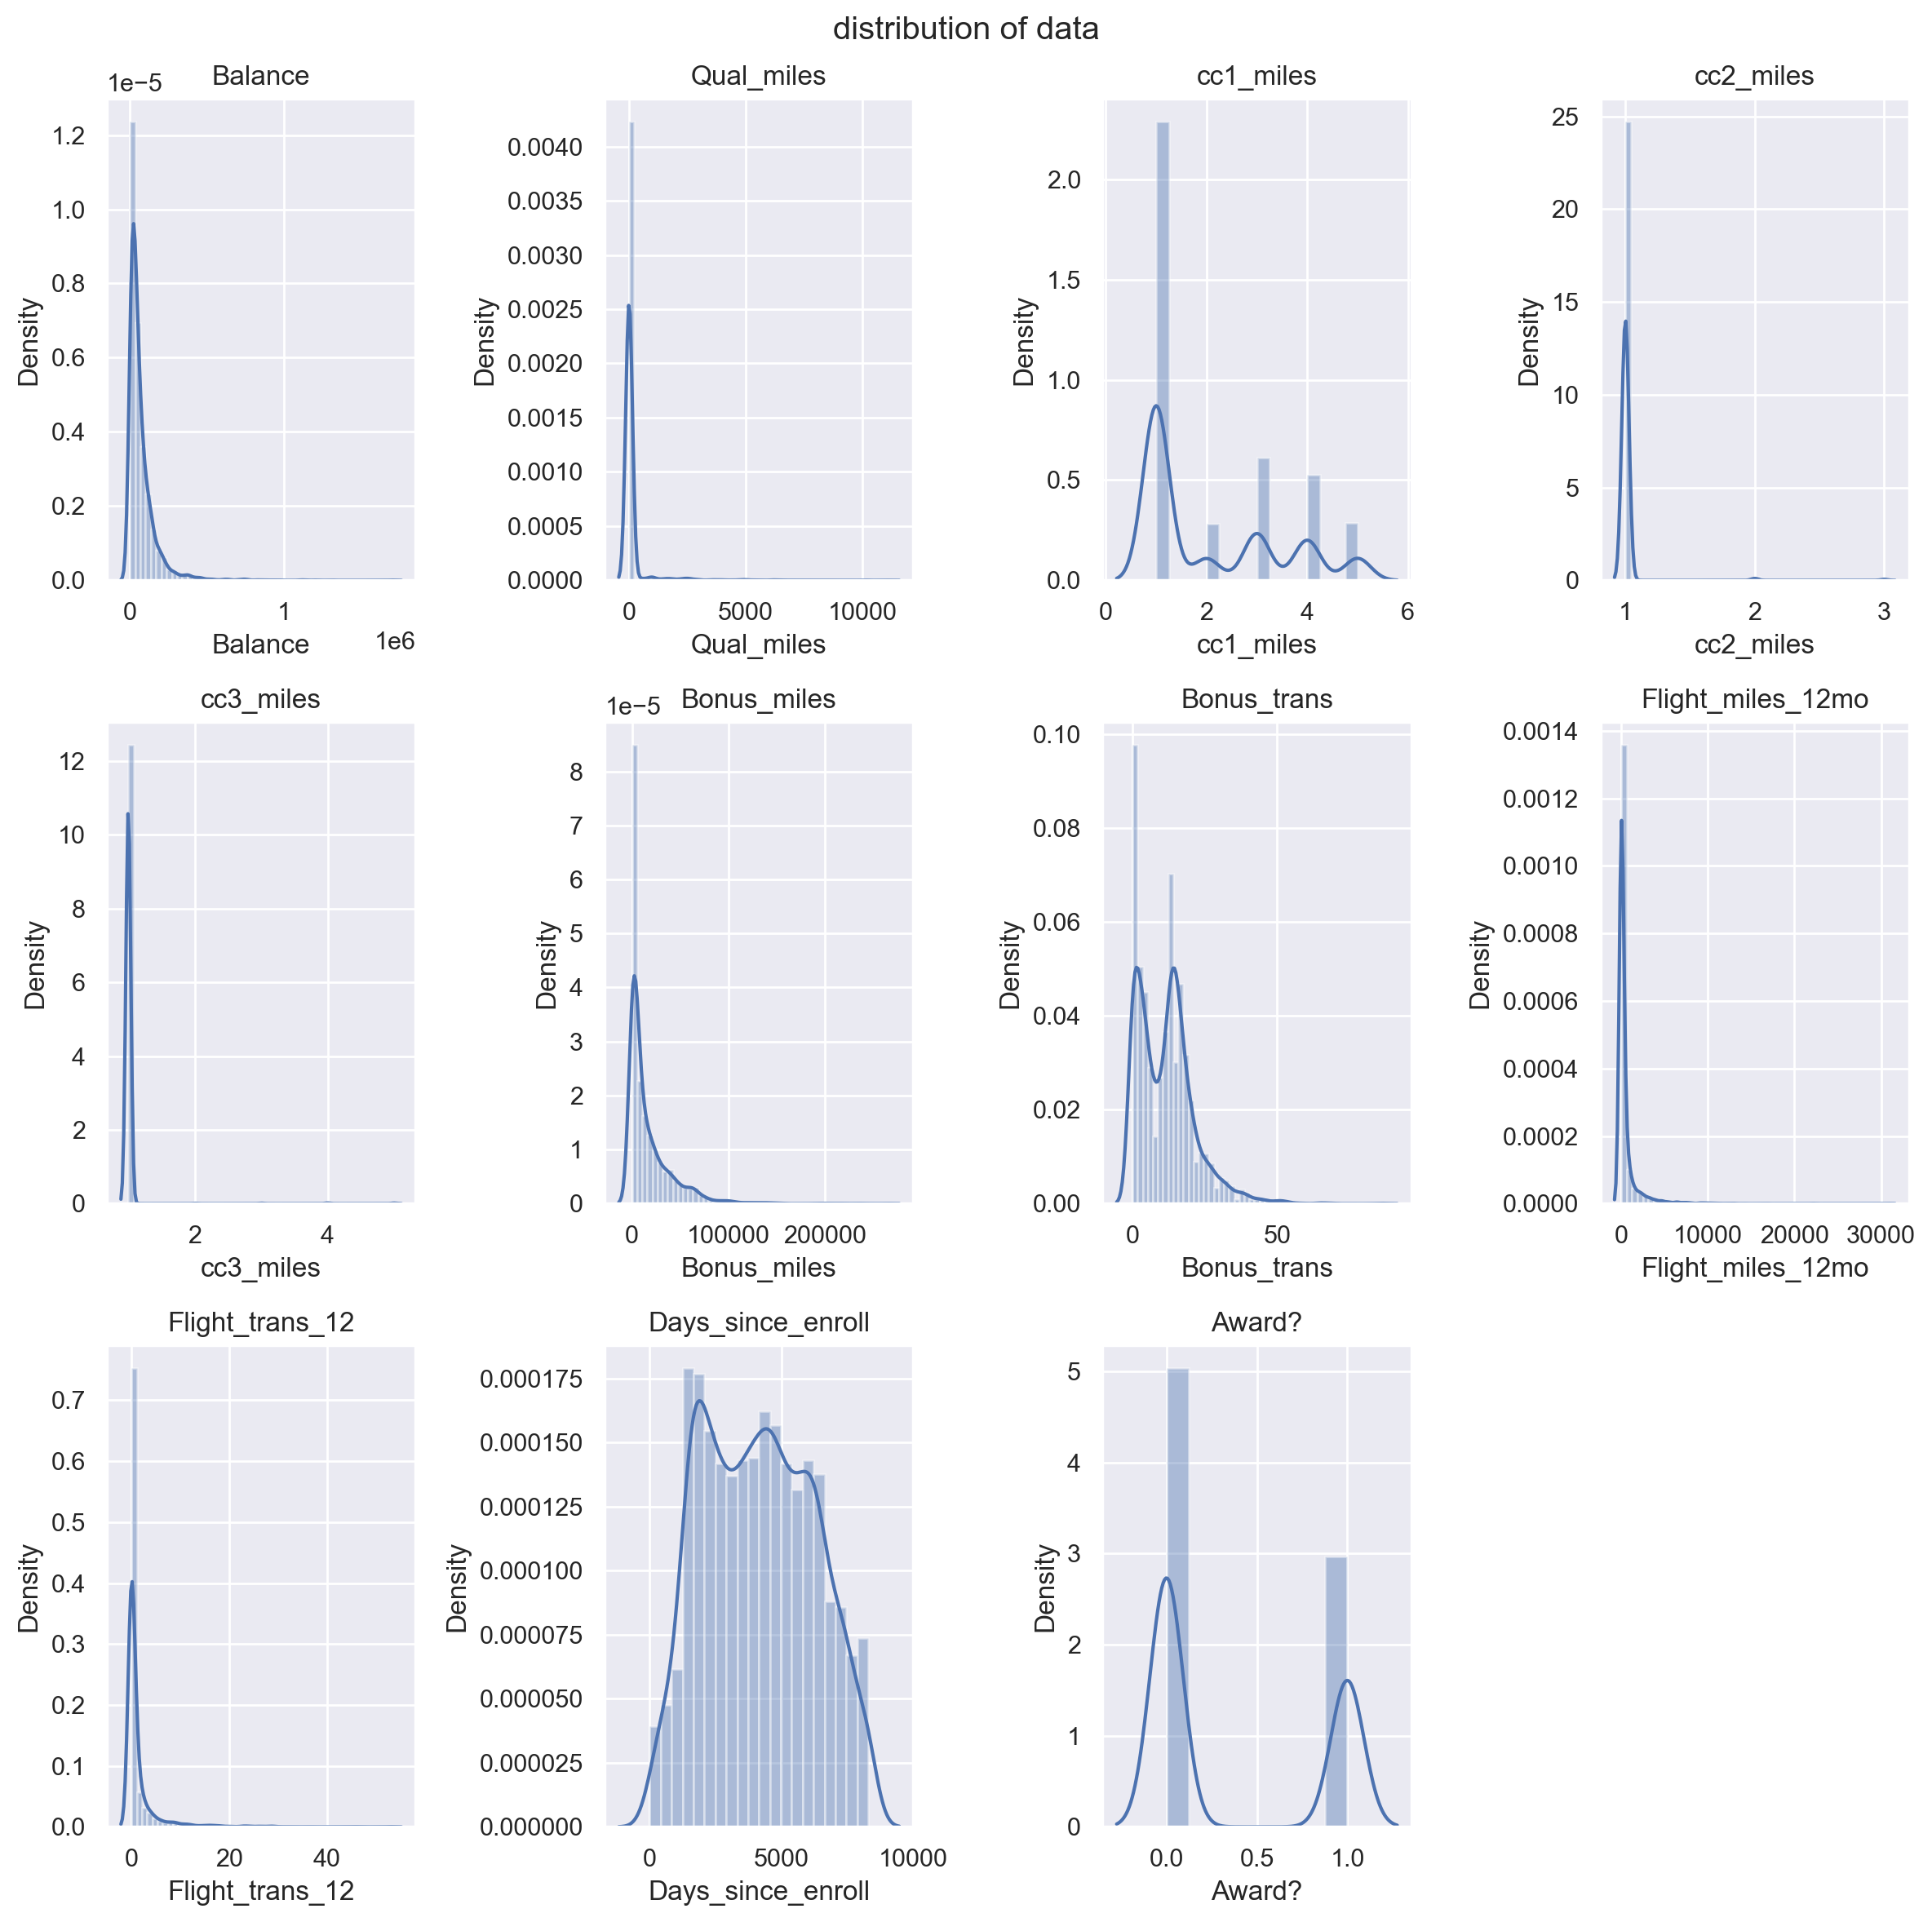

In [12]:
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of data")
for i in df.loc[:,:]:
    plt.subplot(3,4,k)
    sns.distplot(df[i])
    plt.title(i)
    plt.tight_layout()
    k+=1

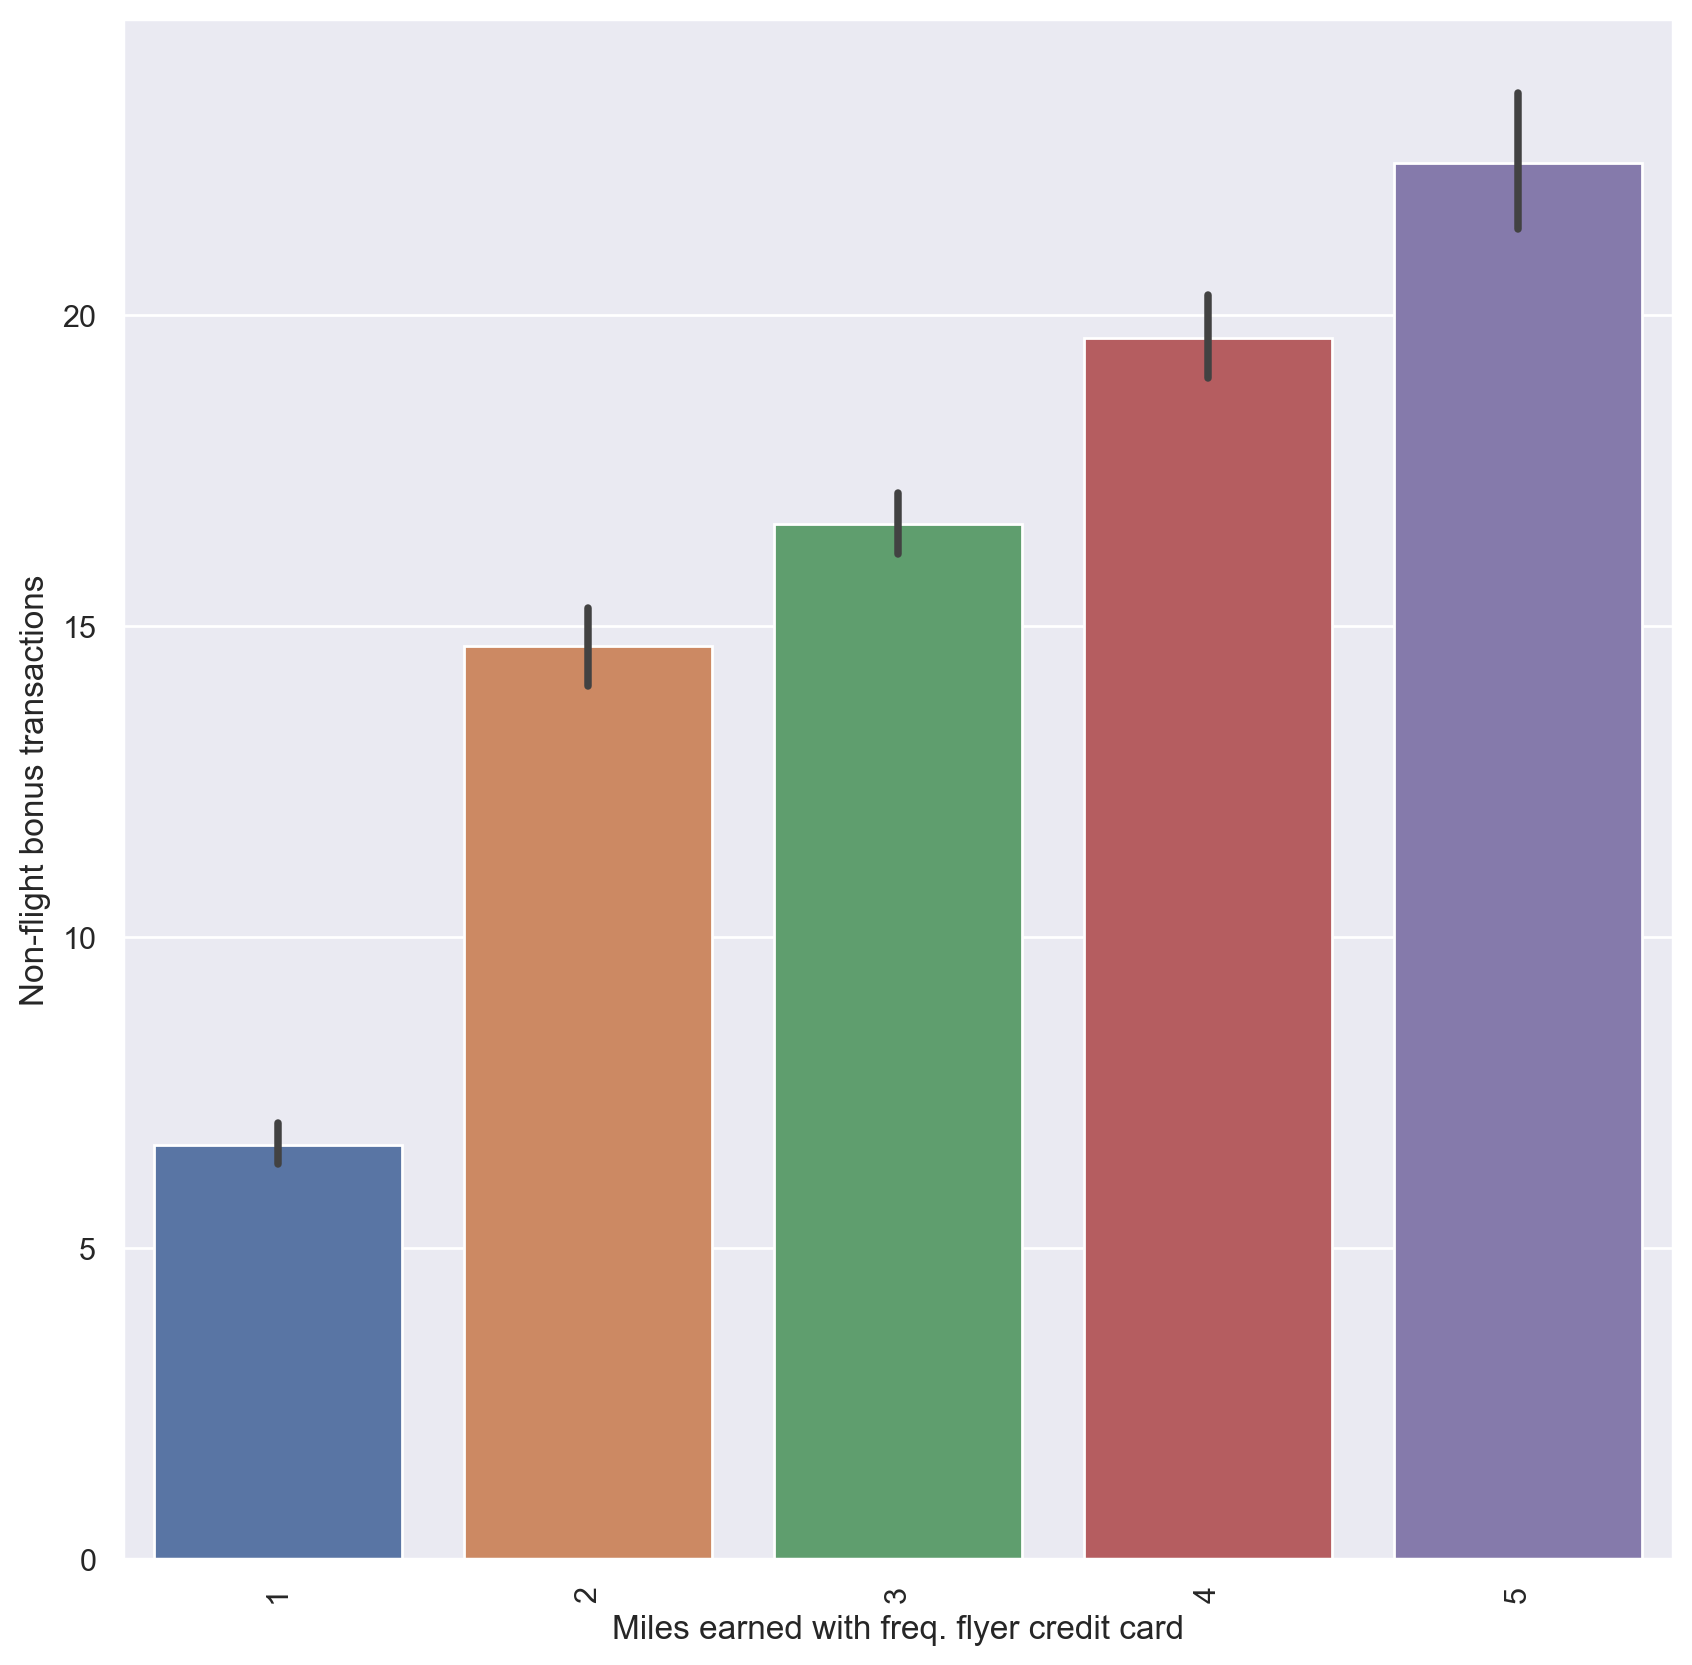

In [13]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (10,10))
sorted_data = df[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

In [14]:
countNotermdeposit = len(df[df['Award?'] == 0])
counthavetermdeposit = len(df[df['Award?'] == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(df['Award?']))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((counthavetermdeposit / (len(df['Award?']))*100)))

Percentage of Customer doesn't have a Award: 62.96%
Percentage of Customer does have a Award: 37.04%


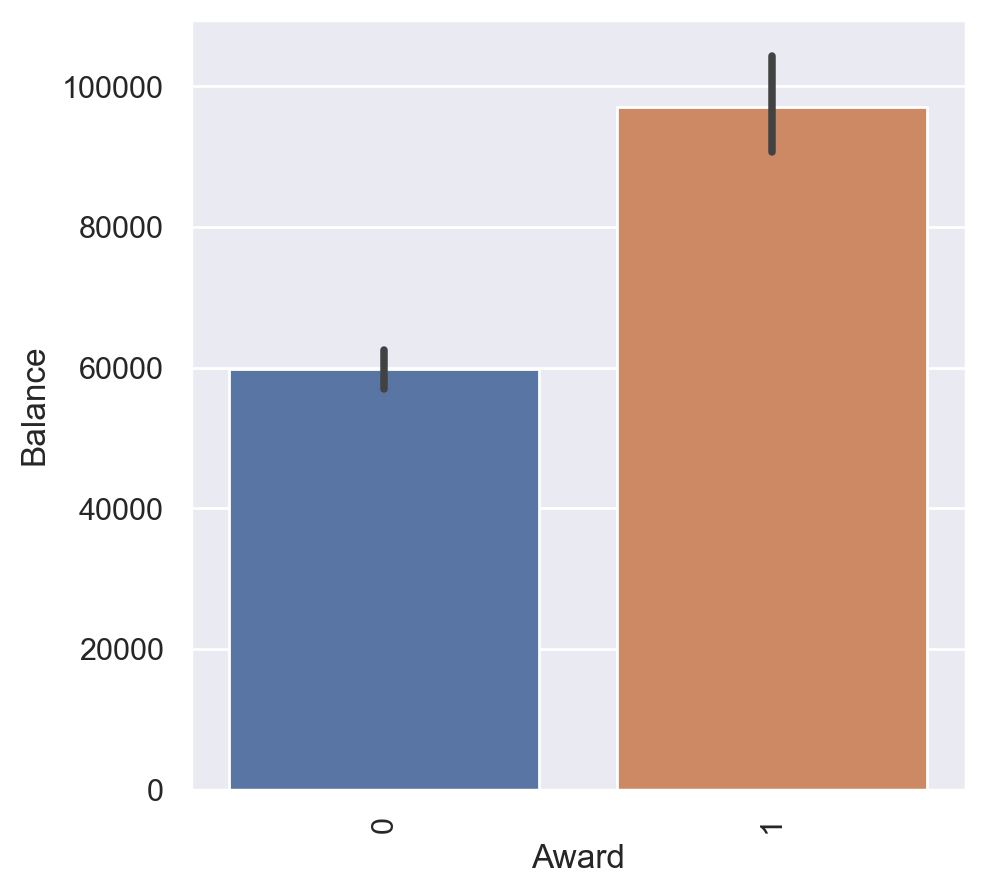

In [15]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = df[['Award?','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award?', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [16]:
# what is correlated with Balance?

corr_matrix = df.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403410
cc1_miles            0.338252
Bonus_trans          0.324797
Days_since_enroll    0.262975
Flight_trans_12      0.255656
Flight_miles_12mo    0.217509
Award?               0.178380
Qual_miles           0.108696
cc3_miles            0.035234
cc2_miles           -0.008822
Name: Balance, dtype: float64

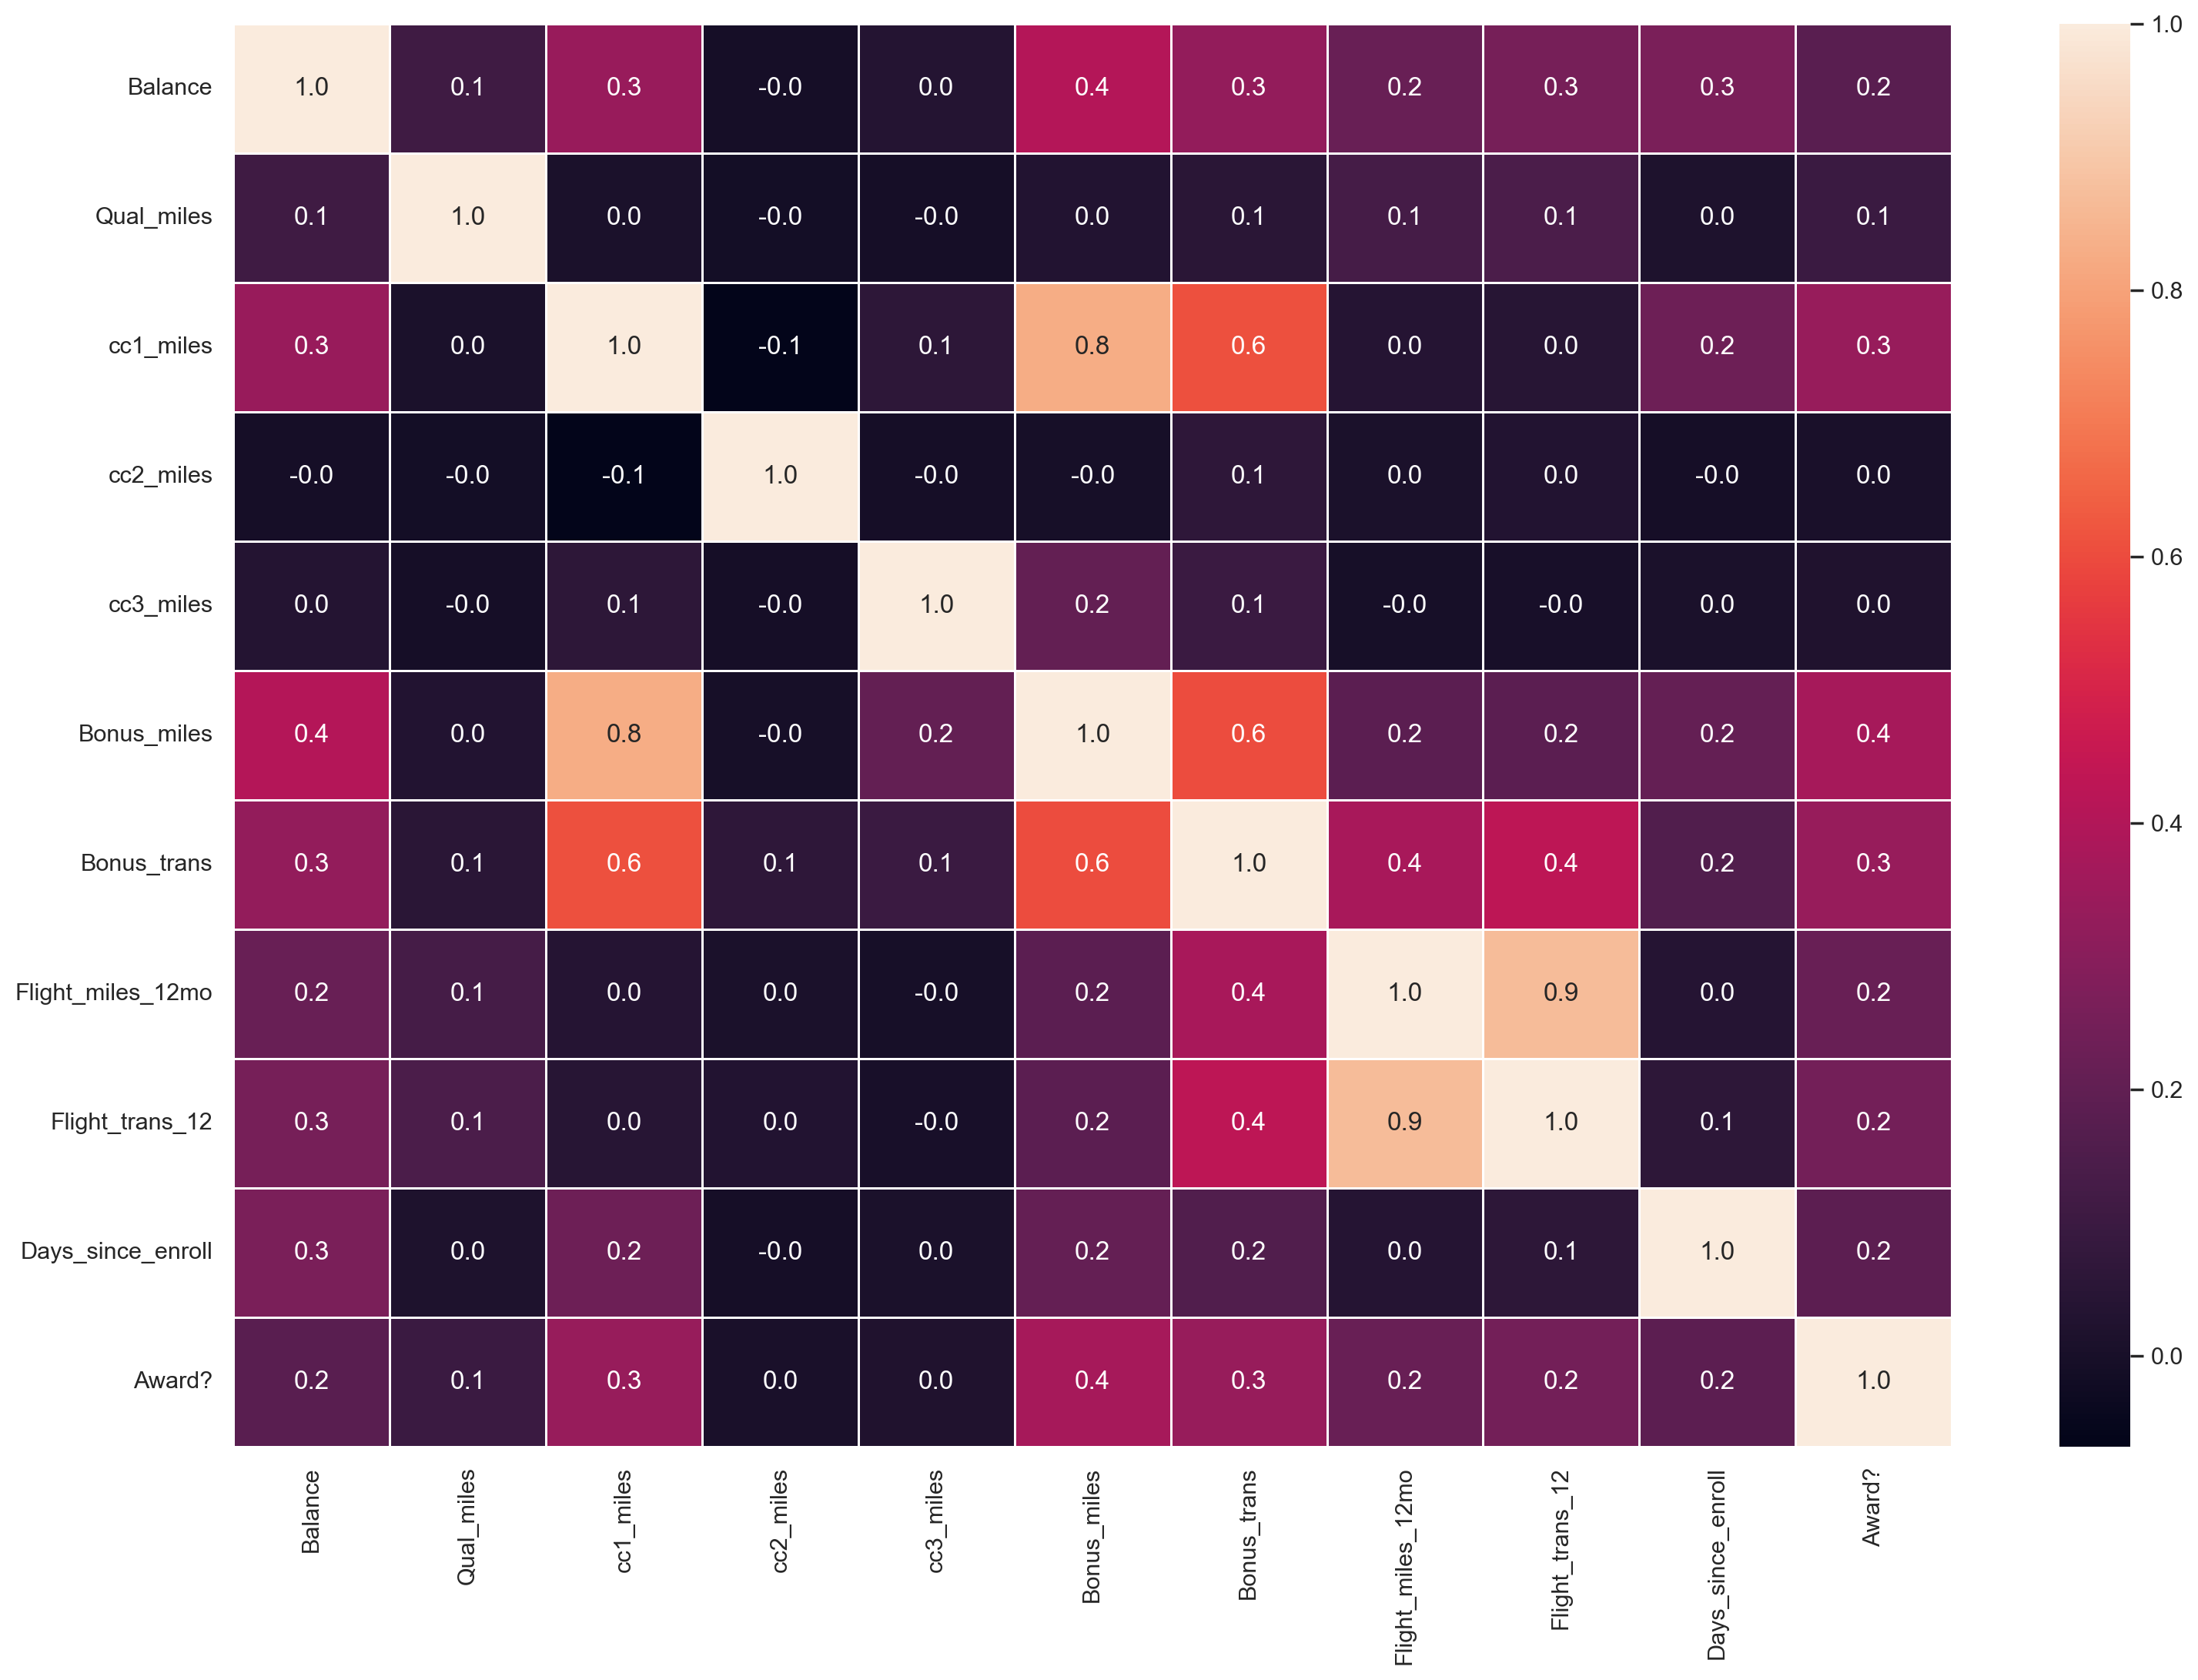

In [17]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()


* Hierarchy Clustering

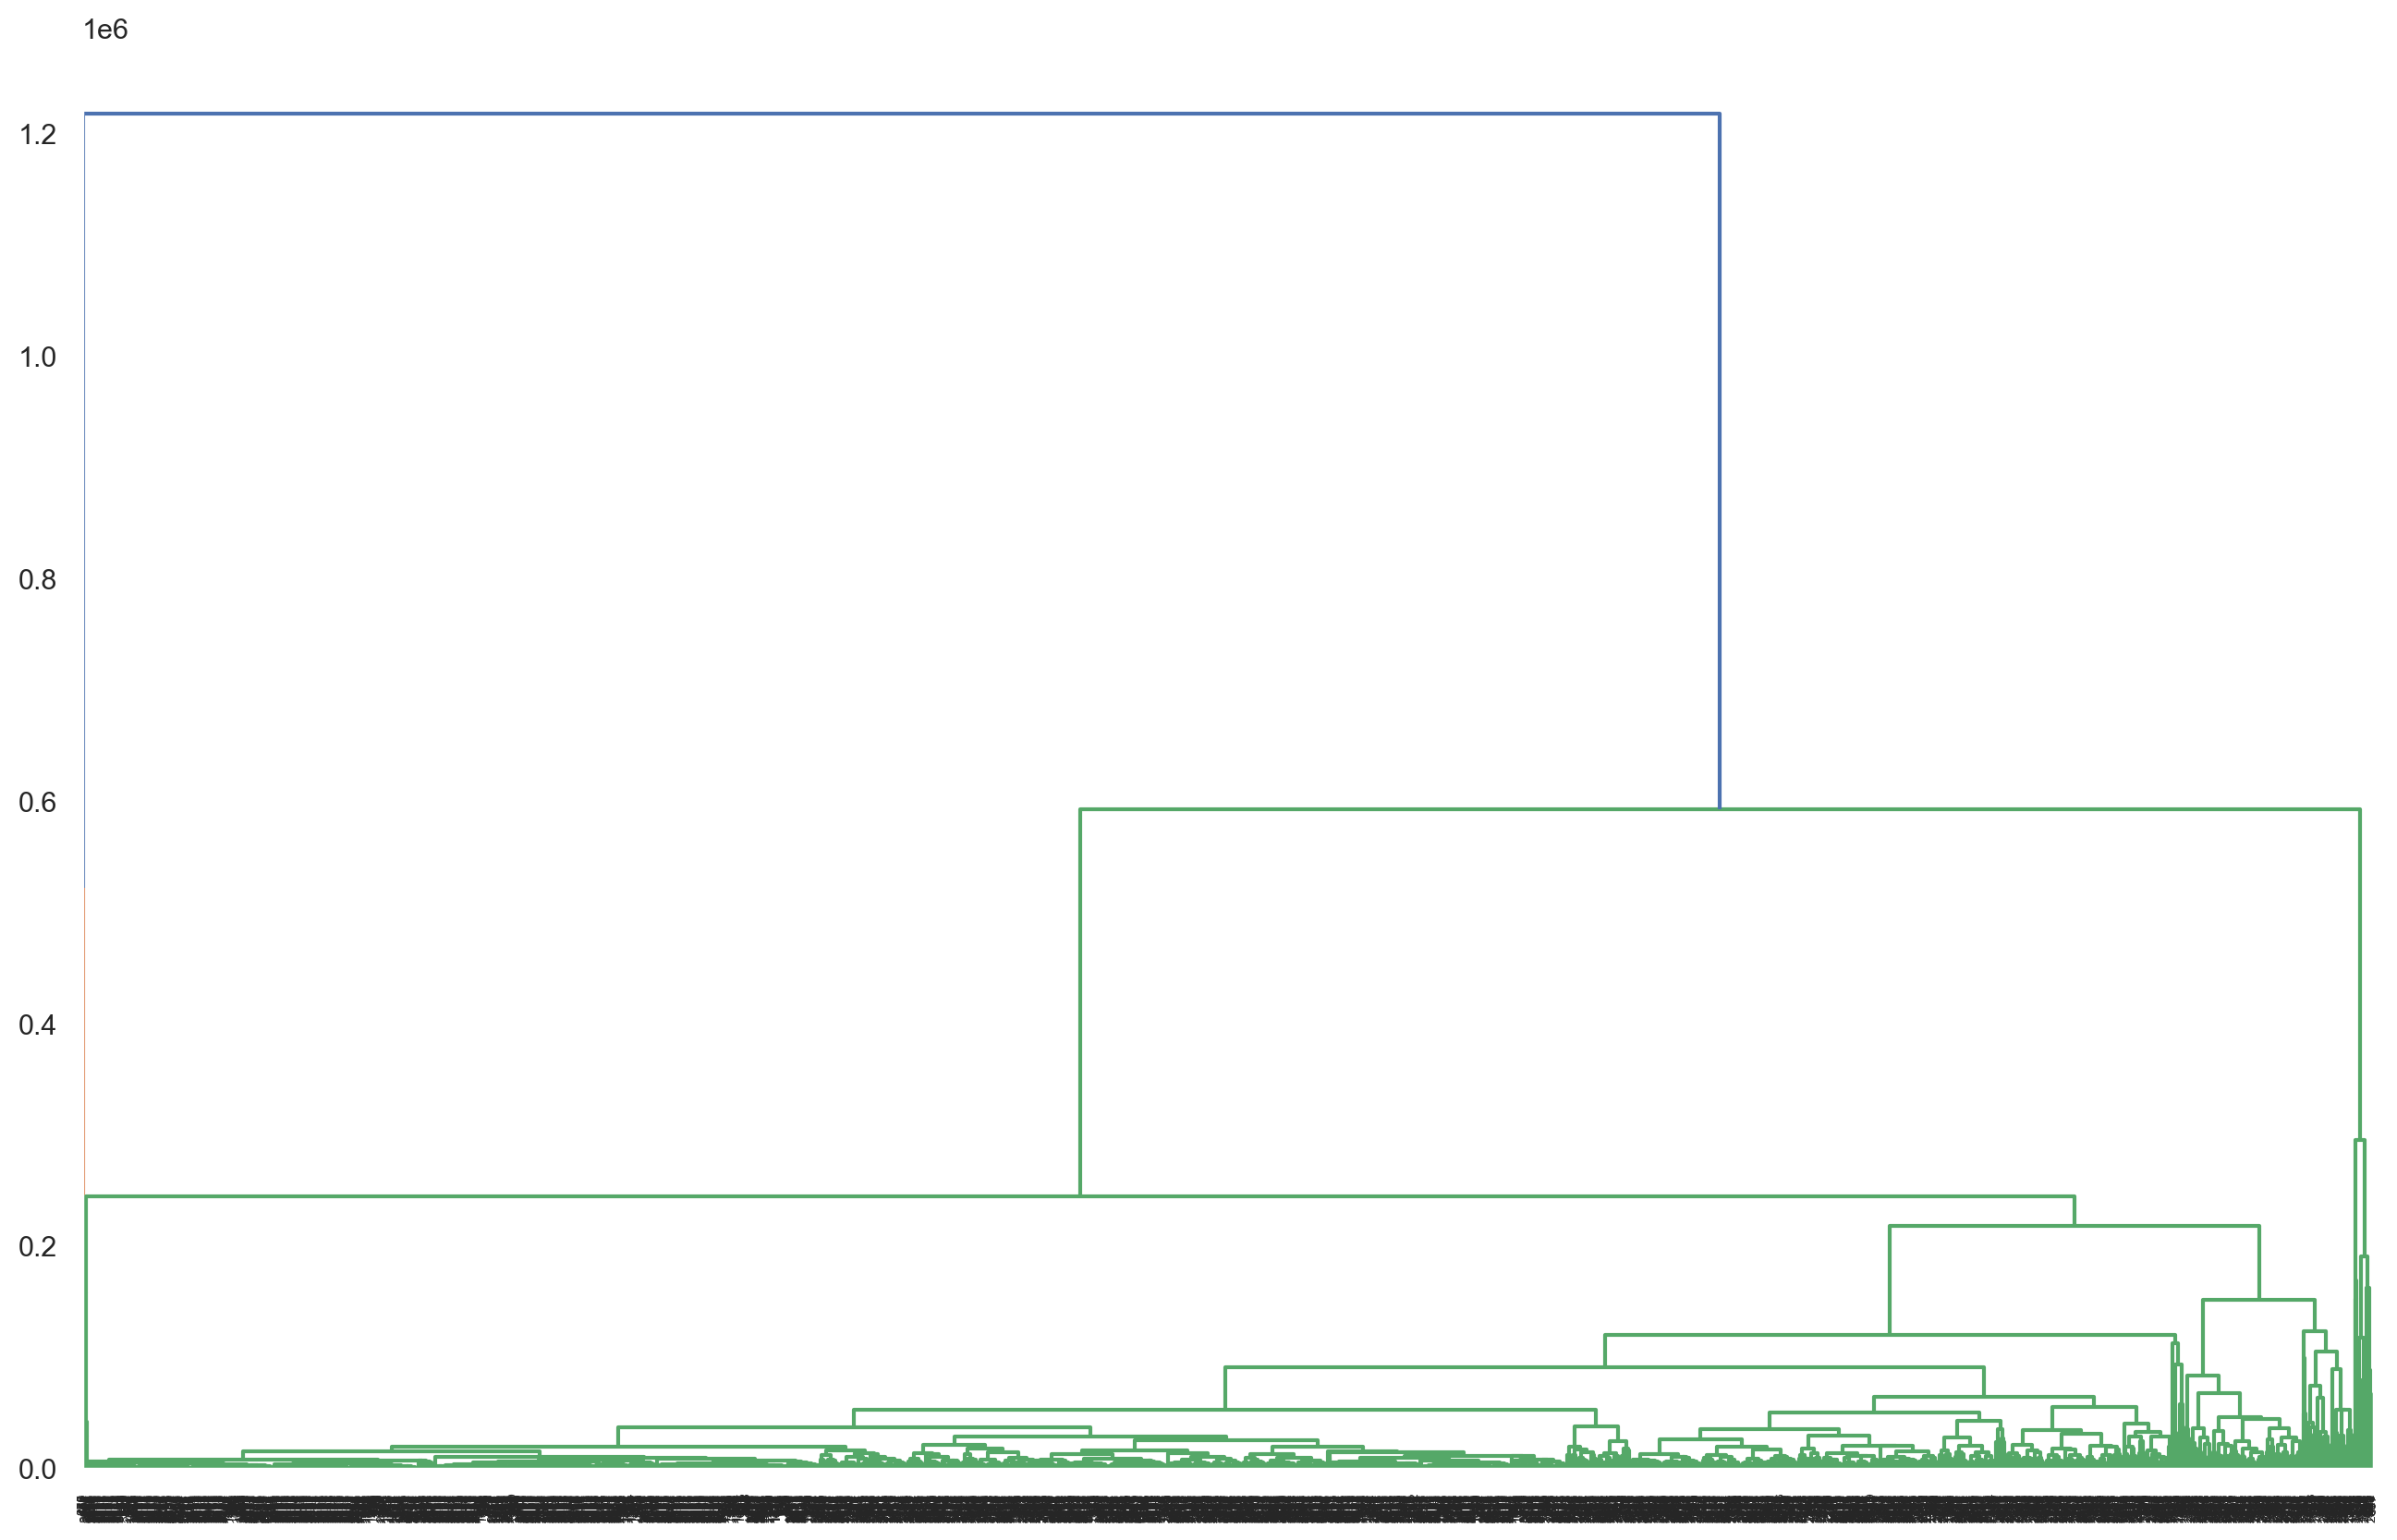

In [18]:
# create dendrogram
plt.figure(figsize = (16, 10));
dendrogram = hierarchy.dendrogram(hierarchy.linkage(df, method='average'))

In [19]:
# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [20]:
# save clusters for chart
y_hc = hc.fit_predict(df)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

Clusters
0            0
1            0
2            0
3            0
4            0
...        ...
3993         0
3994         0
3995         0
3996         0
3997         0

[3998 rows x 1 columns]

In [21]:
airlines1 = pd.concat([df,Clusters], axis=1)
airlines1

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
1     28143.0         0.0        1.0        1.0        1.0        174.0   
2     19244.0         0.0        1.0        1.0        1.0        215.0   
3     41354.0         0.0        1.0        1.0        1.0       4123.0   
4     14776.0         0.0        1.0        1.0        1.0        500.0   
5     97752.0         0.0        4.0        1.0        1.0      43300.0   
...       ...         ...        ...        ...        ...          ...   
2639      NaN         NaN        NaN        NaN        NaN          NaN   
2716      NaN         NaN        NaN        NaN        NaN          NaN   
2718      NaN         NaN        NaN        NaN        NaN          NaN   
3259      NaN         NaN        NaN        NaN        NaN          NaN   
3899      NaN         NaN        NaN        NaN        NaN          NaN   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
1             1.0                0.0              0.0             7000.0   
2             2.0                0.0              0.0             6968.0   
3             4.0                0.0              0.0             7034.0   
4             1.0                0.0              0.0             6952.0   
5            26.0             2077.0              4.0             6935.0   
...           ...                ...              ...                ...   
2639          NaN                NaN              NaN                NaN   
2716          NaN                NaN              NaN                NaN   
2718          NaN                NaN              NaN                NaN   
3259          NaN                NaN              NaN                NaN   
3899          NaN                NaN              NaN                NaN   

      Award?  Clusters  
1        0.0       0.0  
2        0.0       0.0  
3        0.0       0.0  
4        0.0       0.0  
5        1.0       0.0  
...      ...       ...  
2639     NaN       0.0  
2716     NaN       0.0  
2718     NaN       0.0  
3259     NaN       0.0  
3899     NaN       0.0  

[4022 rows x 12 columns]

In [22]:
airlines1.sort_values("Clusters")

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
1     28143.0         0.0        1.0        1.0        1.0        174.0   
2677  61081.0         0.0        4.0        1.0        1.0      37682.0   
2678  27438.0         0.0        1.0        1.0        1.0       2528.0   
2679  14748.0         0.0        1.0        1.0        1.0       2210.0   
2680  49514.0         0.0        1.0        1.0        1.0       4500.0   
...       ...         ...        ...        ...        ...          ...   
4017  18476.0         0.0        1.0        1.0        1.0       8525.0   
4018  64385.0         0.0        1.0        1.0        1.0        981.0   
4019  73597.0         0.0        3.0        1.0        1.0      25447.0   
4020  54899.0         0.0        1.0        1.0        1.0        500.0   
4021   3016.0         0.0        1.0        1.0        1.0          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
1             1.0                0.0              0.0             7000.0   
2677         21.0             2000.0              4.0             2509.0   
2678          6.0             2528.0              6.0             2490.0   
2679          7.0                0.0              0.0             2497.0   
2680         22.0                0.0              0.0             2569.0   
...           ...                ...              ...                ...   
4017          4.0              200.0              1.0             1403.0   
4018          5.0                0.0              0.0             1395.0   
4019          8.0                0.0              0.0             1402.0   
4020          1.0              500.0              1.0             1401.0   
4021          0.0                0.0              0.0             1398.0   

      Award?  Clusters  
1        0.0       0.0  
2677     0.0       0.0  
2678     0.0       0.0  
2679     1.0       0.0  
2680     0.0       0.0  
...      ...       ...  
4017     1.0       NaN  
4018     1.0       NaN  
4019     1.0       NaN  
4020     0.0       NaN  
4021     0.0       NaN  

[4022 rows x 12 columns]

* K-Means

In [23]:
kmeans = KMeans(n_clusters=14,random_state=0)
kmeans.fit(df)

KMeans(n_clusters=14, random_state=0)

In [24]:
kmeans.inertia_

1837662208243.3901

In [25]:
wcss = []
for i in range(1, 19):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

In [26]:
wcss

[42956247163679.82,
 20820865882330.6,
 11790749795493.654,
 7548625331980.041,
 5723830893261.444,
 4540922556647.977,
 3696901833974.662,
 3272255543259.73,
 2897232615212.25,
 2626127129125.97,
 2388186782813.5464,
 2144340597043.559,
 1998899783432.9668,
 1837662208243.3901,
 1705346394726.7217,
 1576731057870.963,
 1480908837645.4966,
 1379245761265.2449]

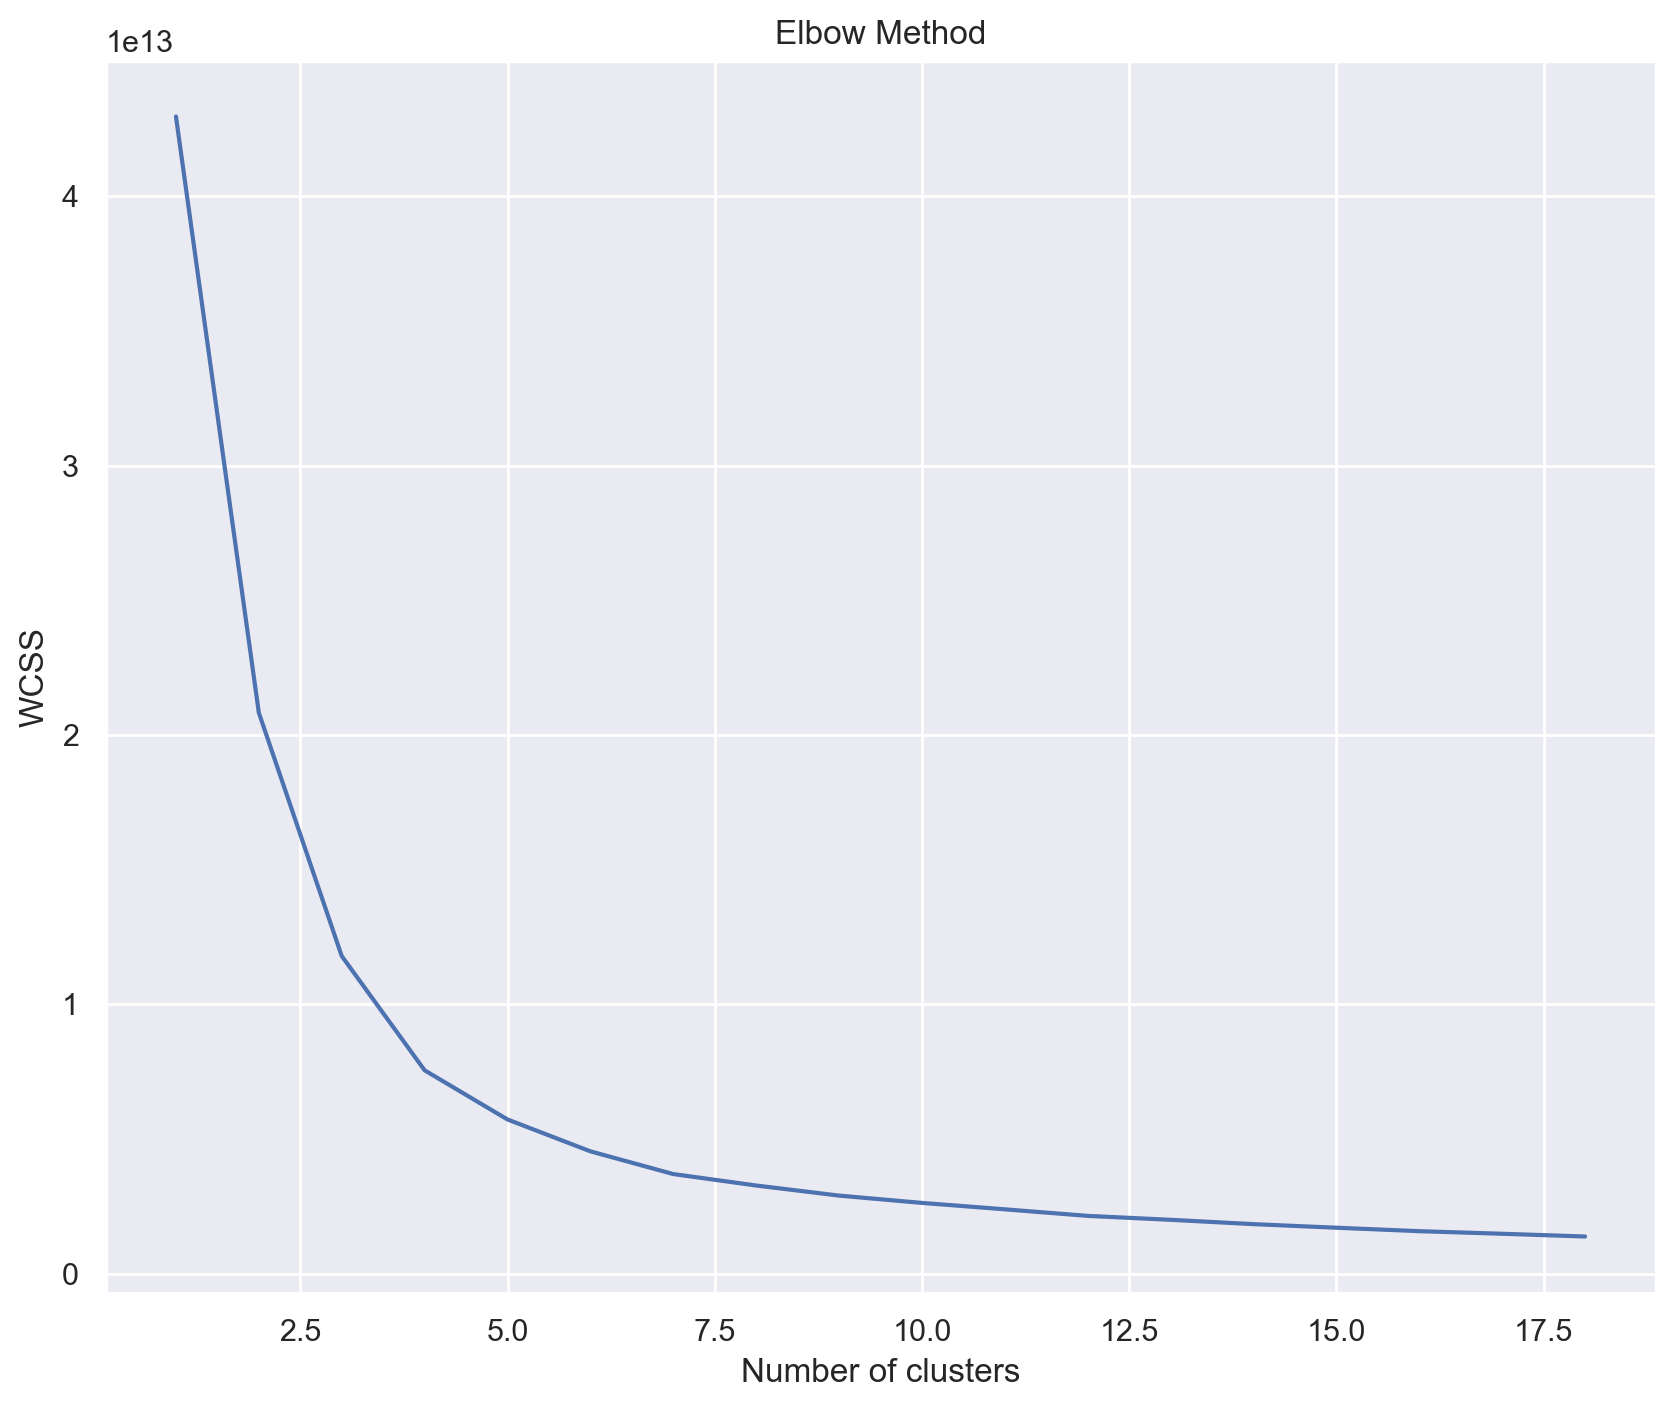

In [27]:
plt.plot(range(1, 19), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(7, random_state=0)
clusters_new.fit(df)

KMeans(n_clusters=7, random_state=0)

In [29]:
clusters_new.labels_

array([2, 2, 2, ..., 5, 5, 2])

* DBSCAN

In [30]:
a=df.values
a

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [31]:

stscaler = StandardScaler().fit(a)
X1 = stscaler.transform(a)

In [32]:
dbscan = DBSCAN(eps=0.82, min_samples=6)
ypred = dbscan.fit_predict(X1)

In [33]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [34]:
cl=pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [35]:
airlines4 = pd.concat([df,cl],axis=1)
airlines4

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
1     28143.0         0.0        1.0        1.0        1.0        174.0   
2     19244.0         0.0        1.0        1.0        1.0        215.0   
3     41354.0         0.0        1.0        1.0        1.0       4123.0   
4     14776.0         0.0        1.0        1.0        1.0        500.0   
5     97752.0         0.0        4.0        1.0        1.0      43300.0   
...       ...         ...        ...        ...        ...          ...   
2639      NaN         NaN        NaN        NaN        NaN          NaN   
2716      NaN         NaN        NaN        NaN        NaN          NaN   
2718      NaN         NaN        NaN        NaN        NaN          NaN   
3259      NaN         NaN        NaN        NaN        NaN          NaN   
3899      NaN         NaN        NaN        NaN        NaN          NaN   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
1             1.0                0.0              0.0             7000.0   
2             2.0                0.0              0.0             6968.0   
3             4.0                0.0              0.0             7034.0   
4             1.0                0.0              0.0             6952.0   
5            26.0             2077.0              4.0             6935.0   
...           ...                ...              ...                ...   
2639          NaN                NaN              NaN                NaN   
2716          NaN                NaN              NaN                NaN   
2718          NaN                NaN              NaN                NaN   
3259          NaN                NaN              NaN                NaN   
3899          NaN                NaN              NaN                NaN   

      Award?  Cluster  
1        0.0      0.0  
2        0.0      0.0  
3        0.0      0.0  
4        0.0     -1.0  
5        1.0      0.0  
...      ...      ...  
2639     NaN      0.0  
2716     NaN      1.0  
2718     NaN      1.0  
3259     NaN      0.0  
3899     NaN      1.0  

[4022 rows x 12 columns]

In [36]:
airlines4['Cluster'].value_counts()

 0.0    2221
 1.0     956
-1.0     801
 2.0      13
 3.0       7
Name: Cluster, dtype: int64

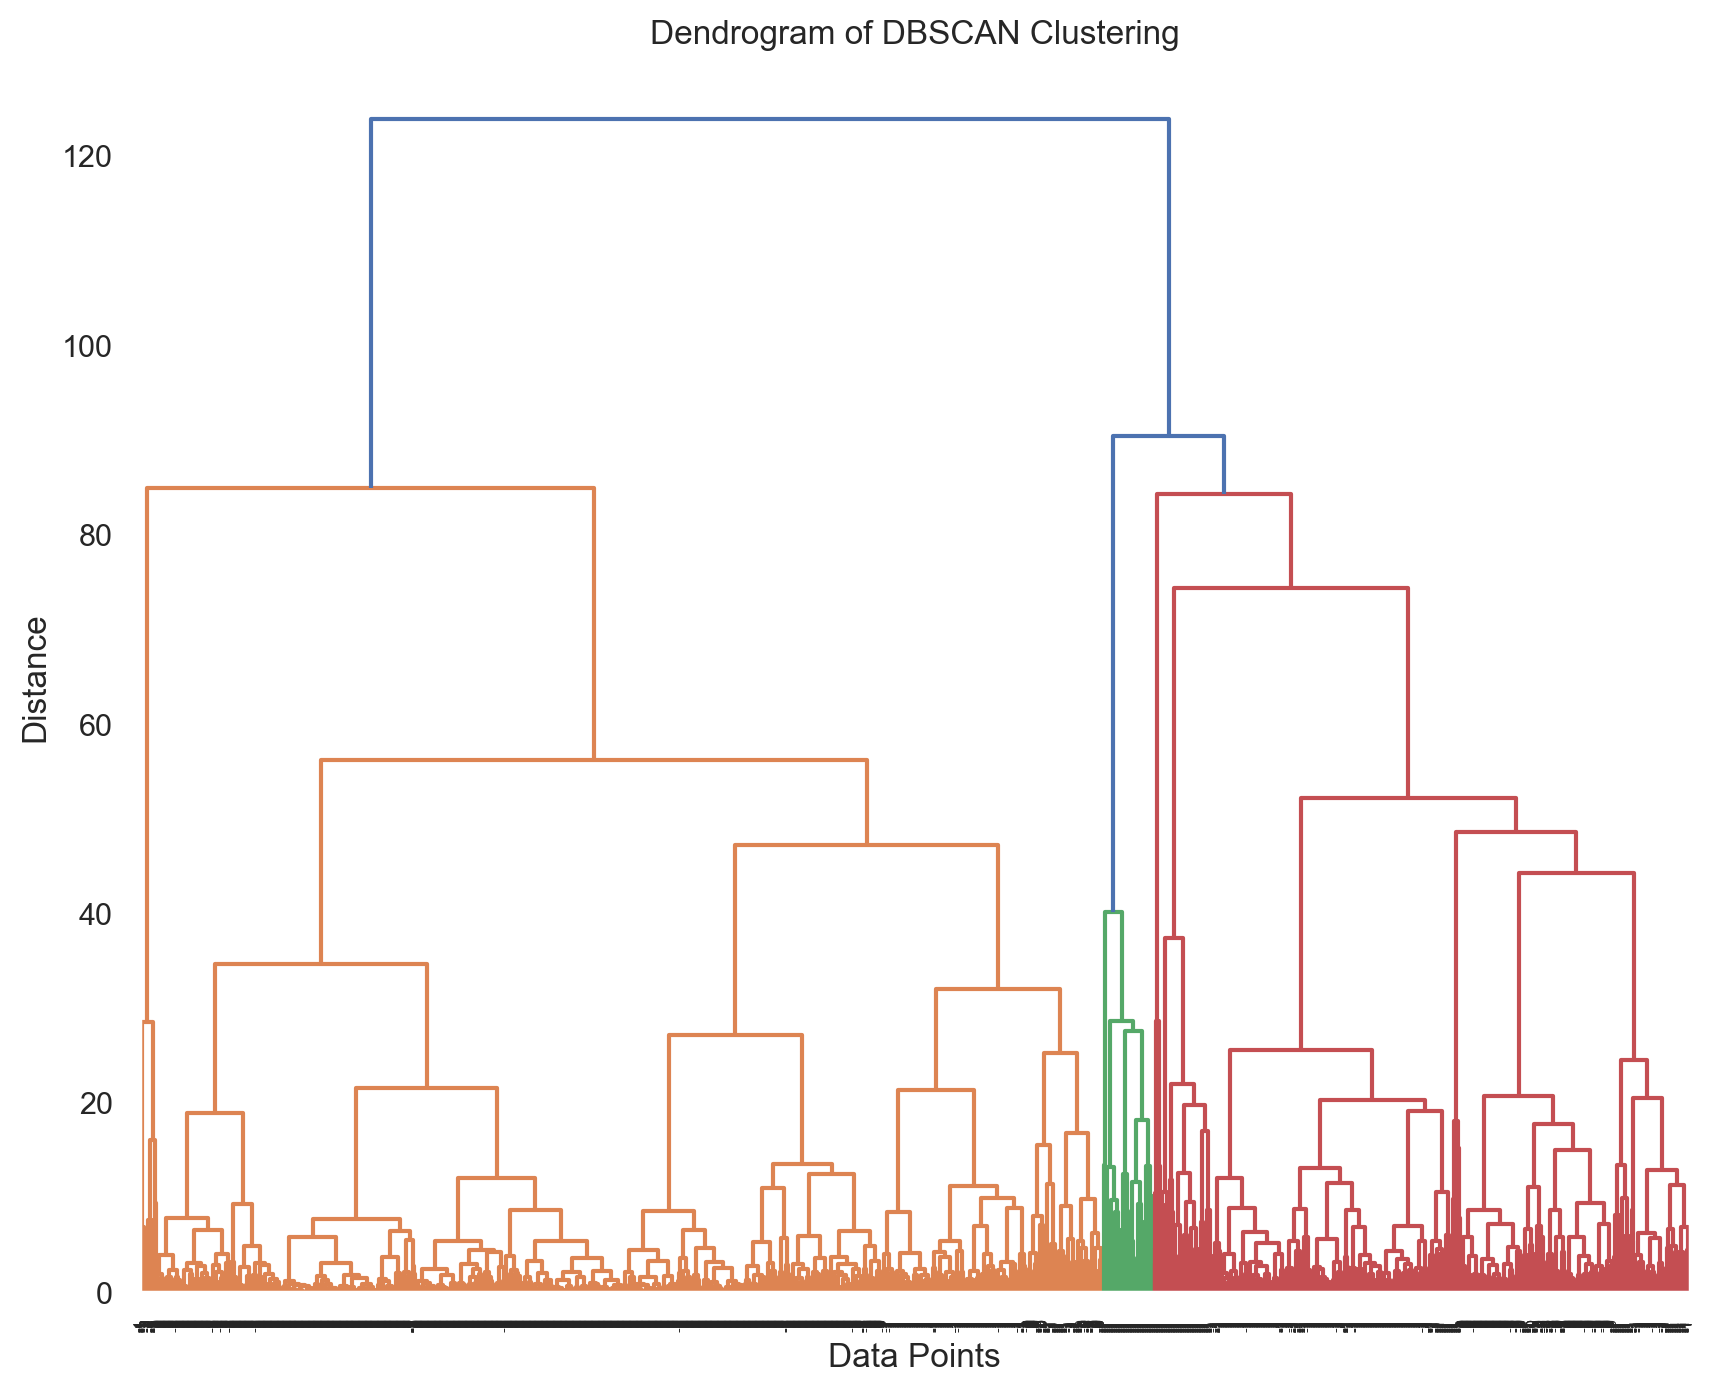

In [37]:
linkage_matrix = hierarchy.linkage(X1, 'ward')
hierarchy.dendrogram(linkage_matrix, labels = ypred)
plt.title('Dendrogram of DBSCAN Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()